# 테이블형 데이터 다루기

## 배열 만들기

In [10]:
import numpy as np
numbers = np.array(range(1, 11), copy=True)
numbers

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Array copy 만들기

In [11]:
x = np.array([1, 2, 3])
y = x
z = np.copy(x)

x[0] = 10
print(x[0] == y[0])
print(x[0] == z[0])

True
False


## Shallow copy, deep copy

In [12]:
a = np.array([1, 'm', [2, 3, 4]], dtype=object)
b = np.copy(a)
b[2][0] = 10
a

array([1, 'm', list([10, 3, 4])], dtype=object)

In [13]:
import copy
a = np.array([1, 'm', [2, 3, 4]], dtype=object)
c = copy.deepcopy(a)
c[2][0] = 10
c
a

array([1, 'm', list([2, 3, 4])], dtype=object)

## Array 만들기

In [14]:
# ones = np.ones(2,4)
# ones

In [15]:
ones = np.ones([2, 4], dtype=np.float64)
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [16]:
zeros = np.zeros([2, 4], dtype=np.float64)
zeros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [17]:
empty = np.empty([2, 4], dtype=np.float64)
# 배열의 내용물이 항상 0인 것은 아니다.
empty
# zeros와는 달리 array value를 0으로 세팅하지 않음. 약간 빠를 수 있음.

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
ones.shape # 아직 변형되지 않았다면 원래 모양을 반환한다.
numbers.ndim # len(numbers.shape)와 같다.
zeros.dtype

dtype('float64')

In [21]:
eye = np.eye(10)
eye

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [23]:
np_numbers = np.arange(2, 5, 0.25)
np_numbers

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 ,
       4.75])

In [24]:
# np_inumbers = np_numbers.astype(np.int)
np_inumbers = np_numbers.astype(int)
np_inumbers

array([2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

## 행/열 전환과 형태 변형하기

In [12]:
sap = np.array(["MMM", "ABT", "ABBV", "ACN", "ACE", "ATVI", "ADBE", "ADT"])
sap

array(['MMM', 'ABT', 'ABBV', 'ACN', 'ACE', 'ATVI', 'ADBE', 'ADT'],
      dtype='<U4')

In [13]:
sap2d = sap.reshape(2, 4)
sap2d

array([['MMM', 'ABT', 'ABBV', 'ACN'],
       ['ACE', 'ATVI', 'ADBE', 'ADT']], dtype='<U4')

In [14]:
sap3d = sap.reshape(2, 2, 2)
sap3d

array([[['MMM', 'ABT'],
        ['ABBV', 'ACN']],

       [['ACE', 'ATVI'],
        ['ADBE', 'ADT']]], dtype='<U4')

In [15]:
sap2d.T

array([['MMM', 'ACE'],
       ['ABT', 'ATVI'],
       ['ABBV', 'ADBE'],
       ['ACN', 'ADT']], dtype='<U4')

In [16]:
sap3d.swapaxes(1, 2)

array([[['MMM', 'ABBV'],
        ['ABT', 'ACN']],

       [['ACE', 'ADBE'],
        ['ATVI', 'ADT']]], dtype='<U4')

In [17]:
sap3d.transpose((0, 2, 1))

array([[['MMM', 'ABBV'],
        ['ABT', 'ACN']],

       [['ACE', 'ADBE'],
        ['ATVI', 'ADT']]], dtype='<U4')

## 인덱싱과 자르기

In [18]:
dirty = np.array([9, 4, 1, -0.01, -0.02, -0.001])
whos_dirty = dirty < 0 # 불 배열을 불 인덱스로 사용한다.
whos_dirty

array([False, False, False,  True,  True,  True])

In [19]:
dirty[whos_dirty] = 0 # 모든 음수값을 0으로 바꾼다.
dirty

array([9., 4., 1., 0., 0., 0.])

In [20]:
# -0.5와 0.5 사이에 위치한 아이템은 무엇일까?
linear = np.arange(-1, 1.1, 0.2)
(linear <= 0.5) & (linear >= -0.5)
# <, <= 등과 같은 관계형 연산자는 &, |, !와 같은 비트 단위 연산자보다 처리순위가 떨어지므로
# 반드시 ()를 통해 우선순위를 설정해야 함.

array([False, False, False,  True,  True,  True,  True,  True, False,
       False, False])

### 스마트 인덱싱, 스마트 슬라이싱

In [21]:
sap[[1, 2, -1]]

array(['ABT', 'ABBV', 'ADT'], dtype='<U4')

In [22]:
sap2d[:, [1]]

array([['ABT'],
       ['ATVI']], dtype='<U4')

## 브로드캐스팅 (배열끼리의 벡터화된 사칙연산)

In [23]:
a = np.arange(4)
b = np.arange(1, 5)
a+b

array([1, 3, 5, 7])

In [24]:
c = [0, 1, 2, 3]
d = [1, 2, 3, 4]
c+d

[0, 1, 2, 3, 1, 2, 3, 4]

In [25]:
a*5

array([ 0,  5, 10, 15])

In [26]:
c*5

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]

In [27]:
noise = np.eye(4) + 0.01 * np.ones((4, ))
noise


noise = np.eye(4) + 0.01 * np.random.random([4, 4])
np.round(noise, 2)

array([[1.01, 0.01, 0.01, 0.01],
       [0.01, 1.01, 0.01, 0.01],
       [0.01, 0.01, 1.01, 0.01],
       [0.01, 0.01, 0.01, 1.01]])

array([[1.  , 0.  , 0.01, 0.01],
       [0.  , 1.  , 0.01, 0.01],
       [0.  , 0.01, 1.01, 0.01],
       [0.01, 0.01, 0.  , 1.  ]])

## 유니버셜 함수

In [28]:
# 여덟 종목의 이틀간의 주가
stocks = np.array([140.49, 0.97, 40.68, 41.53, 55.7, 57.21, 98.2, 99.19, 109.96, 111.47, 35.71, 36.27, 87.85, 89.11, 30.22, 30.91])
stocks

array([140.49,   0.97,  40.68,  41.53,  55.7 ,  57.21,  98.2 ,  99.19,
       109.96, 111.47,  35.71,  36.27,  87.85,  89.11,  30.22,  30.91])

In [29]:
# Reshape를 통해 보기 좋게 가공
stocks = stocks.reshape(8, 2).T
stocks

array([[140.49,  40.68,  55.7 ,  98.2 , 109.96,  35.71,  87.85,  30.22],
       [  0.97,  41.53,  57.21,  99.19, 111.47,  36.27,  89.11,  30.91]])

In [30]:
fall = np.greater(stocks[0], stocks[1])
fall

array([ True, False, False, False, False, False, False, False])

In [31]:
# fall이라는 boolean array를 이용한 boolean indexing
sap[fall]

array(['MMM'], dtype='<U4')

In [32]:
# 새 MMM 주식 가격이 결측치라고 가정해보자.
stocks[1, 0] = np.nan
np.isnan(stocks)

array([[False, False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False]])

In [33]:
stocks[np.isnan(stocks)] = 0
stocks

array([[140.49,  40.68,  55.7 ,  98.2 , 109.96,  35.71,  87.85,  30.22],
       [  0.  ,  41.53,  57.21,  99.19, 111.47,  36.27,  89.11,  30.91]])

## 조건부 함수 이해하기

In [34]:
# 어떤 종목의 가격이 눈에 띄게 (즉, 1.00달러 이상) 변화했는지 알아보자.
# numpy.where
changes = np.where(np.abs(stocks[1] - stocks[0]) > 1.00,
                   stocks[1] - stocks[0], 0)
changes


array([-140.49,    0.  ,    1.51,    0.  ,    1.51,    0.  ,    1.26,
          0.  ])

In [35]:
# 할당한 주식기호를 출력하도록 해보자.
sap[np.nonzero(changes)]

array(['MMM', 'ABBV', 'ACE', 'ADBE'], dtype='<U4')

In [36]:
# Boolean indexing으로도 출력가능하다.
sap[np.abs(stocks[1] - stocks[0]) > 1.00]

array(['MMM', 'ABBV', 'ACE', 'ADBE'], dtype='<U4')

In [37]:
# 평균 수준보다 크게 변화한 주식을 추출해 보자.
sap[np.abs(stocks[0] - stocks[1]) > np.mean(np.abs(stocks[0] - stocks[1]))]

array(['MMM'], dtype='<U4')

## 배열 집계와 정렬

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Accrued Interest')

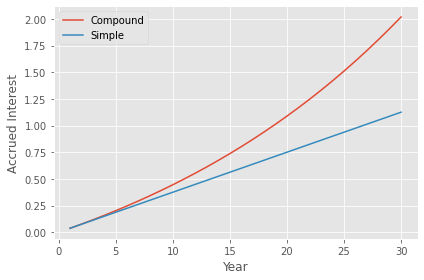

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib   # matplotlib은 나중에...

# 주어진 이자에 대한 단리/복리 이자비용을 출력해 보자.
RATE = .0375    # 3.75%
TERM = 30
simple = (RATE * np.ones(TERM)).cumsum()
compound = ((1 + RATE) * np.ones(TERM)).cumprod() - 1

matplotlib.style.use("ggplot")
t = np.arange(1, 31)
plt.plot(t, compound)
plt.plot(t, simple)
plt.legend(["Compound", "Simple"], loc=2)
plt.xlabel("Year")
plt.ylabel("Accrued Interest")
plt.tight_layout()
plt.savefig("interest.pdf")

## 배열을 집합처럼 다루기

In [39]:
# 배열 내 아이템의 순서보다, 배열의 내용물이 더 중요한 시나리오가 있다.
dna = "AGTCCGCGAATACAGGCTCGGT"
dna_as_array = np.array(list(dna))
dna_as_array

array(['A', 'G', 'T', 'C', 'C', 'G', 'C', 'G', 'A', 'A', 'T', 'A', 'C',
       'A', 'G', 'G', 'C', 'T', 'C', 'G', 'G', 'T'], dtype='<U1')

In [40]:
np.unique(dna_as_array)

array(['A', 'C', 'G', 'T'], dtype='<U1')

In [41]:
# "In one dimension"
np.in1d(["MSFT", "MMM", "AAPL"], sap)

array([False,  True, False])

In [42]:
np.intersect1d(["MSFT", "MMM", "AAPL"], sap)

array(['MMM'], dtype='<U4')

In [43]:
np.union1d(["MSFT", "MMM", "AAPL"], sap)

array(['AAPL', 'ABBV', 'ABT', 'ACE', 'ACN', 'ADBE', 'ADT', 'ATVI', 'MMM',
       'MSFT'], dtype='<U4')